In [7]:
# ----------------------------------------------------------------------------
#
# TITLE - run_linear_model_bar.ipynb
# AUTHOR - James Lane
# PROJECT - AST 1501
#
# ----------------------------------------------------------------------------
#
# Docstrings and metadata:
'''Use the linear model to find the amplitudes of different bar models.
'''

__author__ = "James Lane"

In [8]:
# General
import numpy as np
import pdb, sys, importlib, copy, importlib
from tqdm import tqdm_notebook

## Plotting
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

## Astropy
from astropy import units as apu
from astropy.io import fits
from astropy.table import Table

## Galpy

## Add project-specific package. Assume relative location
sys.path.append('../../src/')
import ast1501.util
import ast1501.fourier
import ast1501.df
import ast1501.linear_model

In [9]:
### Matplotlib for notebooks
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Debugging, automatically drop in during error
# %pdb
from IPython.core.debugger import set_trace

In [10]:
matplotlib.rc('text', usetex=True)

# Meta

## Information:

## Future Work:

Use the new ```LinearModel``` class to examine the $m=2$ amplitudes of long-slow bar models.

# Prepare

## Load Gaia DR2 Data

In [11]:
### Load catalogs
gaiadr2_apogee_catalog = '../../data/generated/gaiadr2-apogee_dr14_dataset.FIT'
f = fits.open(gaiadr2_apogee_catalog)
data = f[1].data

### Cut on galactocentric absolute Z < 0.3 kpc
where_low_z = np.where( np.abs(data['Z']) < 0.3 )[0]
data_low_z = data[where_low_z] 
z_select_text = r'$|$Z$_{GC}| < 0.3$ kpc'

### Read catalog values

# ID, RA, Dec, logg, abundances, errors
apid = data_low_z['APOGEE_ID']
locid = data_low_z['LOCATION_ID']
vhelio = data_low_z['VHELIO']
pmll = data_low_z['PM_LL']
pmbb = data_low_z['PM_BB']
gc_x = data_low_z['X']
gc_y = data_low_z['Y']
gc_z = data_low_z['Z']
gc_vx = data_low_z['VX']
gc_vy = data_low_z['VY']
gc_vz = data_low_z['VZ']

### Convert to galactocentric radius and radial velocity
gc_R = np.sqrt(np.square(gc_x)+np.square(gc_y))
gc_phi = np.arctan2(gc_y,gc_x)
gc_vR = np.cos(gc_phi)*gc_vx + np.sin(gc_phi)*gc_vy
gc_vT = np.sin(gc_phi)*gc_vx - np.cos(gc_phi)*gc_vy
gc_phi = np.arctan2(gc_y,-gc_x)

## Set Parameters

In [12]:
# Radial bin range and size
R_lim = [12,15]
R_bin_size = 0.75
R_bin_cents = np.arange( R_lim[0], R_lim[1], R_bin_size ) + R_bin_size/2

# Phi bin range and size
phi_lim = [-np.pi/2, np.pi/2]
phi_bin_size = np.pi/30
phi_bin_cents = np.arange( phi_lim[0], phi_lim[1], phi_bin_size ) + phi_bin_size/2

# Phib bin range and size
phib_lim = [-np.pi/4, np.pi/4]
phib_bin_size = np.pi/60
phib_bin_cents = np.arange( phib_lim[0], phib_lim[1], phib_bin_size ) + phib_bin_size/2


# Check out the amplitudes of 2 bars

In [7]:
importlib.reload(ast1501.linear_model)

<module 'ast1501.linear_model' from '../../src/ast1501/linear_model.py'>

In [8]:
lm_sfb = ast1501.linear_model.LinearModel(instantiate_method=2, 
    df_filename='../../scripts/generate_bar_df/2019-05-20/data.npy', phib_bin_size=phib_bin_size,
    phib_lims=phib_lim)
lm_lsb = ast1501.linear_model.LinearModel(instantiate_method=2, 
        df_filename='../../scripts/generate_lsbar_df/2019-05-27/data.npy', phib_bin_size=phib_bin_size,
    phib_lims=phib_lim)
lm_th = ast1501.linear_model.LinearModel(instantiate_method=2, 
        df_filename='../../scripts/generate_triaxial_df/2019-03-30/data0.npy', phib_bin_size=phib_bin_size,
    phib_lims=phib_lim)

../../src/ast1501/linear_model.py:942: RuntimeWarning: divide by zero encountered in log
  likelihood_vT[j,:] = np.log(lin_likelihood_vT)

../../src/ast1501/linear_model.py:948: RuntimeWarning: divide by zero encountered in log
  likelihood_vR[j,:] = np.log(lin_likelihood_vR)



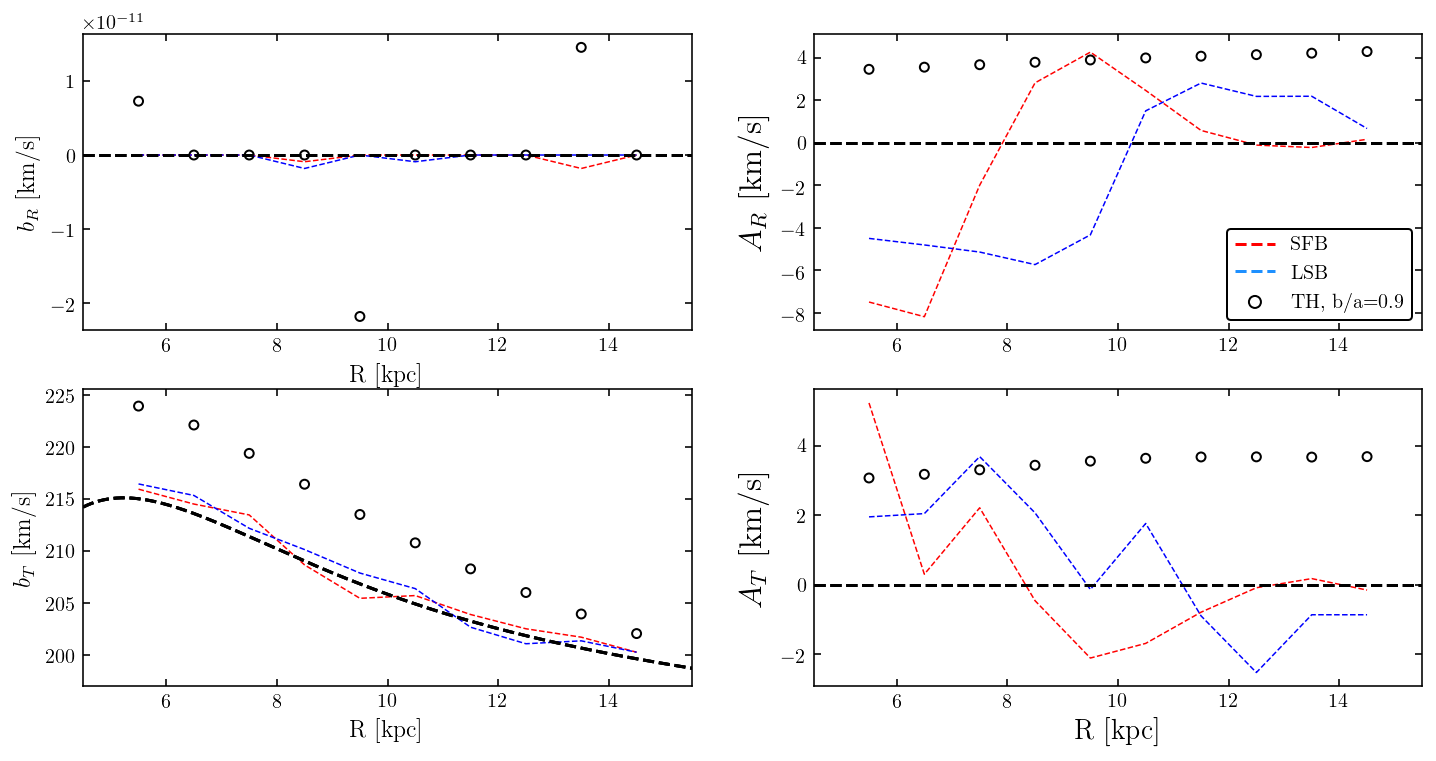

In [23]:


ms=20

# sfb_plot_kws={'ecolor':'Red','marker':'o','markeredgecolor':'Red','color':'Red',
#               'markersize':7,'markerfacecolor':'None','capsize':2,'fmt':'o'}
# sfb_plot_kws={'marker':'o','edgecolor':'Red', 's':ms, 'facecolor':'Red'}
sfb_plot_kws={'color':'Red','linewidth':0.75,'linestyle':'dashed'}
fig, axs = lm_sfb.plot_vRvT_m_r(plot_kws=sfb_plot_kws, plot_type='plot')

# lsb_plot_kws={'ecolor':'DodgerBlue','marker':'o','markeredgecolor':'DodgerBlue','color':'DodgerBlue',
#               'markersize':7, 'markerfacecolor':'None','capsize':2,'fmt':'o'}
# lsb_plot_kws={'marker':'o','edgecolor':'DodgerBlue', 's':ms, 'facecolor':'DodgerBlue'}
lsb_plot_kws={'color':'Blue','linewidth':0.75,'linestyle':'dashed'}
fig, axs = lm_lsb.plot_vRvT_m_r(plot_kws=lsb_plot_kws, fig=fig, axs=axs, plot_type='plot')

# th_plot_kws={'ecolor':'Black','marker':'o','markeredgecolor':'Black','color':'Black',
#               'markersize':7, 'markerfacecolor':'None','capsize':2,'fmt':'o'}
th_plot_kws={'marker':'o','edgecolor':'Black', 's':ms, 'facecolor':'None'}
fig, axs = lm_th.plot_vRvT_m_r(plot_kws=th_plot_kws, fig=fig, axs=axs, plot_type='scatter')

axs[0,1].plot([],[],color='Red',linestyle='dashed',label='SFB')
axs[0,1].plot([],[],color='DodgerBlue',linestyle='dashed',label='LSB')
axs[0,1].scatter([],[],edgecolor='Black',facecolor='None',label='TH, b/a=0.9')
axs[0,1].legend()

axs[0,1].set_ylabel(r'$A_{R}$ [km/s]', fontsize=16)
axs[1,1].set_ylabel(r'$A_{T}$ [km/s]', fontsize=16)
axs[0,1].set_xlabel(r'', fontsize=14)
axs[1,1].set_xlabel(r'R [kpc]', fontsize=14)

fig.set_facecolor('White')
plt.savefig('fig_for_talk.png',dpi=300)
plt.show()
plt.close('all')

# Check out the amplitudes of a range of long-slow bars

In [17]:
# The filenames are made of a number of Af values and OmegaB values
file_base = '../../data/df/MWPotential2014/bar/'

af_handles = ['010','015','020','025']
omegab_handles = ['35','40','45','50','55','60']

linestyles = ['solid','dashed','dashdot','dotted']
bcolors = ['DarkOrange','Red','DodgerBlue','Purple','DarkGreen','Lime']
linewidth=0.5

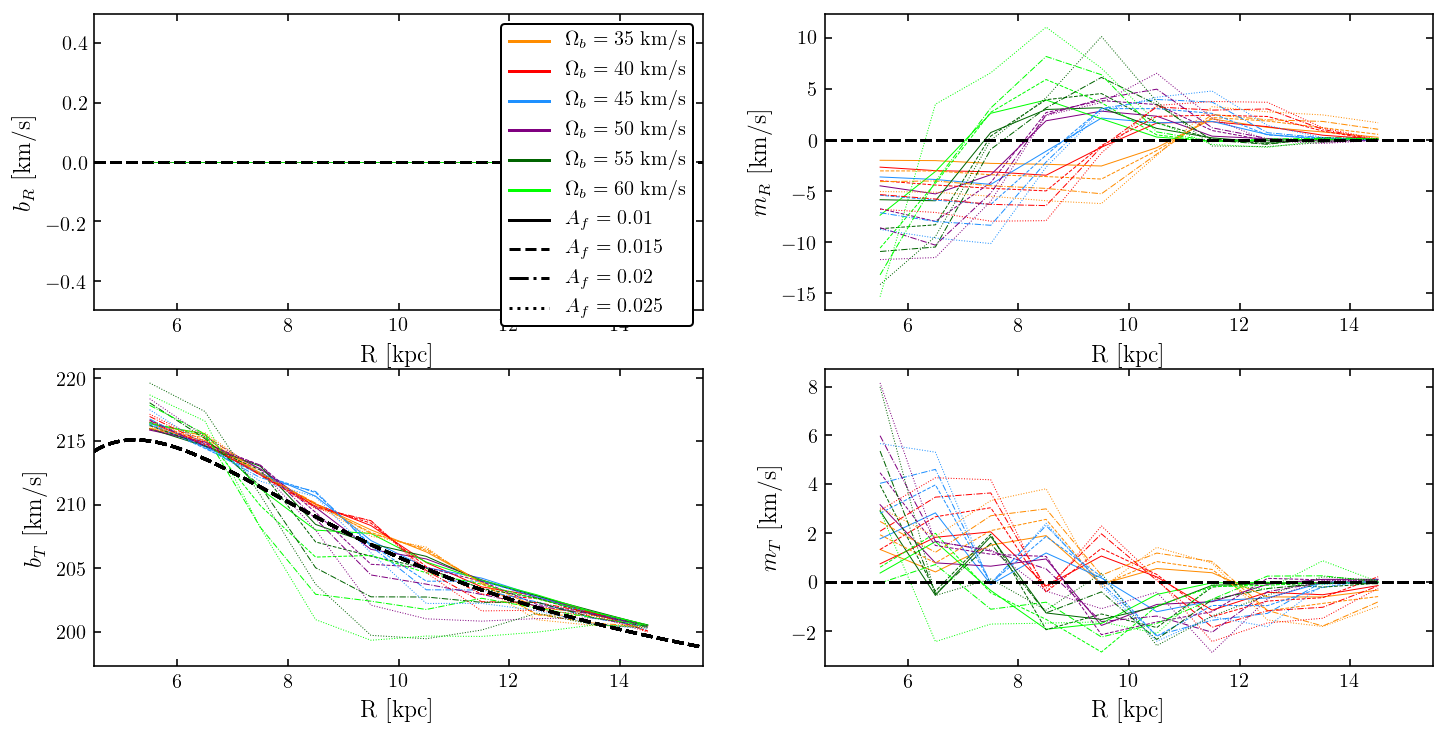

In [19]:
# Loop over both Af and OmegaB
for i in range( len( af_handles ) ):
    for j in range( len( omegab_handles ) ):
        
        # Make the filename and load the LinearModel
        filename = file_base+'data_OMEGAB_'+omegab_handles[j]+'_AF_'+af_handles[i]+'.npy'
        lm_bar = ast1501.linear_model.LinearModel(instantiate_method=2, df_filename=filename, 
            phib_bin_size=phib_bin_size, phib_lims=phib_lim, 
            vT_prior_path='../../data/linear_model_prior/MWPotential2014_df_vT_data.npy')
        
        # Make the plot keywords
        plot_kws={'color':bcolors[j],'linestyle':linestyles[i],'linewidth':linewidth}
        if i==0 and j==0:
            fig,axs = lm_bar.plot_vRvT_m_r(plot_kws=plot_kws, plot_type='plot')
        else:
            fig,axs = lm_bar.plot_vRvT_m_r(plot_kws=plot_kws, fig=fig, axs=axs, plot_type='plot')
        ##ie
    ###j
###i

omegab_labels = [r'$\Omega_{b}=35$ km/s', r'$\Omega_{b}=40$ km/s', r'$\Omega_{b}=45$ km/s',
                r'$\Omega_{b}=50$ km/s', r'$\Omega_{b}=55$ km/s', r'$\Omega_{b}=60$ km/s']
for i in range(len(bcolors)):
    axs[0,0].plot([], [], linestyle='solid', color=bcolors[i], label=omegab_labels[i])
###i
af_labels = [r'$A_{f}=0.01$', r'$A_{f}=0.015$', r'$A_{f}=0.02$', r'$A_{f}=0.025$']
for i in range(len(linestyles)):
    axs[0,0].plot([], [], color='Black', linestyle=linestyles[i], label=af_labels[i])
###i

axs[0,0].set_ylim(-0.5,0.5)
axs[0,0].legend()

fig.set_facecolor('White')
plt.show()

# Check out the Amplitude of Short-Fast bars

In [6]:
# The filenames are made of a number of Af values and OmegaB values
file_base = '../../scripts/generate_sfbar_df_range/2019-08-12/'

af_handles = ['010','015','020','025']
omegab_handles = ['50','55']

linestyles = ['solid','dashed','dotted']
colors = ['DarkOrange','DodgerBlue','Purple','DarkGreen']
linewidth=0.5

In [9]:
# Loop over both Af and OmegaB
for i in range( len( af_handles ) ):
    for j in range( len( omegab_handles ) ):
        
        # Make the filename and load the LinearModel
        filename = file_base+'data_OMEGAB_'+omegab_handles[j]+'_AF_'+af_handles[i]+'.npy'
        lm_bar = ast1501.linear_model.LinearModel(instantiate_method=2, df_filename=filename, 
            phib_bin_size=phib_bin_size, phib_lims=phib_lim)
        
        # Make the plot keywords
        plot_kws={'color':colors[i],'linestyle':linestyles[j],'linewidth':linewidth}
        if i==0 and j==0:
            fig,axs = lm_bar.plot_vRvT_m_r(plot_kws=plot_kws, plot_type='plot')
        else:
            fig,axs = lm_bar.plot_vRvT_m_r(plot_kws=plot_kws, fig=fig, axs=axs, plot_type='plot')
        ##ie
    ###j
###i

omegab_labels = [r'$\Omega_{b}=50$ km/s', r'$\Omega_{b}=55$ km/s', r'$\Omega_{b}=60$ km/s']
for i in range(len(linestyles)):
    axs[0,0].plot([], [], linestyle=linestyles[i], label=omegab_labels[i])
###i
af_labels = [r'$A_{f}=0.01$', r'$A_{f}=0.015$', r'$A_{f}=0.02$', r'$A_{f}=0.025$']
for i in range(len(colors)):
    axs[0,0].plot([], [], color=colors[i], label=af_labels[i])
###i

axs[0,0].set_ylim(-0.5,0.5)
axs[0,0].legend()

fig.set_facecolor('White')
plt.show()

ValueError: not enough values to unpack (expected 8, got 4)

# Can we interpolate on a bar model?

In [5]:
data = np.load('../../scripts/generate_lsbar_df_range/2019-06-14/data_OMEGAB_35_AF_010.npy')

In [6]:
data[:,3]

array(['-5.4862224263223', '-5.299570019794562', '-4.901640480337894',
       '-4.308298002951159', '-3.5431972798073006', '-2.6368404623231165',
       '-1.6253611366373675', '-0.5490837915575548', '0.5490837915575548',
       '1.6253611366373675', '2.6368404623231165', '3.5431972798073006',
       '4.308298002951159', '4.901640480337894', '5.299570019794562',
       '5.4862224263223', '-6.483717412926354', '-6.3175963588615325',
       '-5.976392365149408', '-5.469561401251327', '-4.811149545774241',
       '-4.01940371995329', '-3.1162660009273195', '-2.1267655291749894',
       '-1.0783248625071977', '0.0', '1.0783248625071977',
       '2.1267655291749894', '3.1162660009273195', '4.01940371995329',
       '4.811149545774241', '5.469561401251327', '5.976392365149408',
       '6.3175963588615325', '6.483717412926354', '-7.481212399530408',
       '-7.329470904057126', '-7.028402586256356', '-6.584141255210528',
       '-6.005738059865645', '-5.304977085637358', '-4.496135271592945',


In [16]:
from scipy import interpolate

def interpolate_bar_model(R,phi,bar_model_data):  
    # Load data
    X_bin_cents = bar_model_data[:,2].astype(float)
    Y_bin_cents = bar_model_data[:,3].astype(float)
    vR_values = bar_model_data[:,4].astype(float)
    vT_values = bar_model_data[:,6].astype(float)
    X_cur = R*np.cos(phi)
    Y_cur = R*np.sin(phi)
    
    # pdb.set_trace()
    
    # Now make the interpolation grid
    interpolation_kind = 'cubic'
    interpolation_function = 'griddata'
    
    if interpolation_function == 'interp2d':
        vR_interpolator = interpolate.interp2d(X_bin_cents, Y_bin_cents, vR_values, 
            kind=interpolation_kind)
        vT_interpolator = interpolate.interp2d(X_bin_cents, Y_bin_cents, vT_values, 
            kind=interpolation_kind)
            
        # Interpolate and return
        vR_interp = vR_interpolator(X_cur, Y_cur)
        vT_interp = vT_interpolator(X_cur, Y_cur)
        
        return vR_interp[0,:], vT_interp[0,:]
    ##fi
    
    if interpolation_function == 'griddata':
        # Try griddata
        bin_cents = np.array([X_bin_cents,Y_bin_cents]).T
        cur_cents = np.array([X_cur,Y_cur]).T
        
        vR_interp = interpolate.griddata(bin_cents, vR_values, cur_cents,
            method=interpolation_kind)
        vT_interp = interpolate.griddata(bin_cents, vT_values, cur_cents,
            method=interpolation_kind)
        return vR_interp, vT_interp
    ##fi
#def

In [8]:
bar_model_data = np.load('../../scripts/generate_lsbar_df_range/2019-06-14/data_OMEGAB_35_AF_010.npy')
print( bar_model_data[100] )
print( bar_model_data[200] )
print( 'vR' )
print( bar_model_data[100][4] )
print( bar_model_data[200][4] )
print( 'vT' )
print( bar_model_data[100][6] )
print( bar_model_data[200][6] )

['9.5' '0.3333333333333333' '8.977090989990009' '3.108349619563446'
 '0.5422686077665473' '27.349570702879777' '208.37792420549192'
 '17.887238955884502']
['12.5' '0.20833333333333334' '12.229712366921921' '2.585369494358013'
 '-0.40031949486614116' '19.389406431682985' '201.345120990965'
 '14.759284213686362']
vR
0.5422686077665473
-0.40031949486614116
vT
208.37792420549192
201.345120990965


In [17]:
bar_model_data = np.load('../../scripts/generate_lsbar_df_range/2019-06-14/data_OMEGAB_35_AF_010.npy')
vR_test,vT_test = interpolate_bar_model(np.array([9.5,12.5]),np.array([0.3333333333333333,0.20833333333333334]),bar_model_data)
print(vR_test)
print(vT_test)

[ 0.54226861 -0.40031949]
[208.37792421 201.34512099]
